In [1]:
import requests
import json

HOST = "http://localhost:8000/"
API_CANCLED = "canclled"
API_PNR_RANKING = "pnr_ranking?flight_id="
API_ALT_FLIGHT="alt_flight?flight_id="

def get_cancled():
    response = requests.request("GET", HOST + API_CANCLED, headers={}, data={})
    return json.loads(response.text)

def get_pnrs(flight_id):
    response = requests.request("GET", HOST + API_PNR_RANKING + str(flight_id), headers={}, data={})
    return json.loads(response.text)

def get_alt_flights(flight_id):
    response = requests.request("GET", HOST + API_ALT_FLIGHT + str(flight_id), headers={}, data={})
    return json.loads(response.text)

In [2]:
MAX_ARRIVAL_SCORE = 70
MIN_ARRIVAL_SCORE = 30
MAX_DEPARTURE_SCORE = 70
MIN_DEPARTURE_SCORE = 30

In [3]:
import datetime

def get_departure_score(pnr, alt_flight):
    #datetime to timestamp
    delay_seconds = (datetime.datetime.fromisoformat(alt_flight["departure_time"].rstrip('Z')) - datetime.datetime.fromisoformat(pnr["departure_time"].rstrip('Z'))).total_seconds()
    delay_hours = delay_seconds / 3600
    delay_score = MAX_DEPARTURE_SCORE + (MIN_DEPARTURE_SCORE - MAX_DEPARTURE_SCORE) * delay_hours / 48
    return delay_score
    
def get_arrival_score(pnr, alt_flight):
    delay_seconds = (datetime.datetime.fromisoformat(alt_flight["arrival_time"].rstrip('Z')) - datetime.datetime.fromisoformat(pnr["arrival_time"].rstrip('Z'))).total_seconds()
    delay_hours = delay_seconds / 3600
    delay_score = MAX_ARRIVAL_SCORE + (MIN_ARRIVAL_SCORE - MAX_ARRIVAL_SCORE) * delay_hours / 48
    return delay_score

In [4]:
cancel = get_cancled()
cancel['data'][0]
map_cabin={ 'F':'F','P':'F','C':'B','J':'B','Z':'B','Q':'P','R':'P','S':'P','T':'P','H':'P','M':'P',
          'Y':'E', 'A':'E', 'B':'E', 'D':'E', 'E':'E', 'G':'E', 'I':'E', 'K':'E', 'L':'E', 'N':'E', 'O':'E',
           'U':'E', 'V':'E','W':'E','X':'E'}

In [5]:
# print(len(get_alt_flights('c53865e9')["data"]["data"]))
# print(type(get_alt_flights('c53865e9')["data"]))
# print(get_alt_flights('c53865e9')["data"])
# for x in get_alt_flights('c53865e9')["data"]:
#     print(x)

In [6]:
pnr={}
alt_flight={}
for f in cancel['data']:
    pnr[f['flight_id']]=get_pnrs(f['flight_id'])['data']
    # print(pnr[f['flight_id']])
    for p in pnr[f['flight_id']]:
        p['arrival_time'] = f['arrival_time']
        p['departure_time'] = f['departure_time']
        # print(p)
    alt=get_alt_flights(f['flight_id'])['data']['data']
    f2=[]
    for flight in alt:
        # print(flight)
        f3={}
        f3['flight_id']=flight['flight_id']
        f3['arrival_time'] = flight['arrival_time']
        f3['departure_time'] = flight['departure_time']
        f3['F']=0
        f3['B']=0
        f3['P']=0
        f3['E']=0
#         print()
        for key in map_cabin:
            if key in flight['avilable_seats']:
                f3[map_cabin[key]]+=flight['avilable_seats'][key]
        f2.append(f3)
    alt_flight[f['flight_id']]=f2
    # break

In [7]:
print(len(alt_flight))
print(len(pnr))
print(len(cancel['data']))
# print(len(pnr['c53865e9']))

48
48
48


In [8]:
for i in alt_flight:
    print(alt_flight[i])
    print(pnr[i])
    break
    

[{'flight_id': '49275e19', 'arrival_time': '2023-12-24T00:22:29.792Z', 'departure_time': '2023-12-23T22:48:29.792Z', 'F': 7, 'B': 0, 'P': 3, 'E': 18}, {'flight_id': 'f02572c1', 'arrival_time': '2023-12-24T05:45:29.626Z', 'departure_time': '2023-12-24T05:27:29.626Z', 'F': 1, 'B': 1, 'P': 1, 'E': 3}]
[{'pnr': '32aae0', 'score': 2500, 'class': 'P', 'pax': 4, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z'}, {'pnr': '075e00', 'score': 2000, 'class': 'C', 'pax': 4, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z'}, {'pnr': '2c0c20', 'score': 1700, 'class': 'Z', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z'}, {'pnr': '2bc67f', 'score': 1600, 'class': 'J', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z'}, {'pnr': '87ed29', 'score': 1100, 'class': 'T', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'depar

In [9]:
used_seat={}

for i in alt_flight:
    for j in alt_flight[i]:
        used_seat[j['flight_id']]={'F':0,'B':0,'P':0,'E':0}
#             print(j)
        
len(used_seat)

162

In [10]:
print(len(pnr))
pnr

48


{'434c32f8': [{'pnr': '32aae0',
   'score': 2500,
   'class': 'P',
   'pax': 4,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'},
  {'pnr': '075e00',
   'score': 2000,
   'class': 'C',
   'pax': 4,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'},
  {'pnr': '2c0c20',
   'score': 1700,
   'class': 'Z',
   'pax': 2,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'},
  {'pnr': '2bc67f',
   'score': 1600,
   'class': 'J',
   'pax': 2,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'},
  {'pnr': '87ed29',
   'score': 1100,
   'class': 'T',
   'pax': 2,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'},
  {'pnr': '802f01',
   'score': 1050,
   'class': 'S',
   'pax': 1,
   'arrival_time': '2023-12-23T05:28:29.504Z',
   'departure_time': '2023-12-23T02:49:29.504Z'}

In [11]:
needed_seat=[]
needed_pnr = {}
for i in pnr:
    alloc={}
    for j in pnr[i]:
        alloc=j
        alloc['flight_id']=i
        needed_seat.append(alloc)
        needed_pnr[j['pnr']]=alloc
print(len(needed_seat))
print(needed_seat)


4014
[{'pnr': '32aae0', 'score': 2500, 'class': 'P', 'pax': 4, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z', 'flight_id': '434c32f8'}, {'pnr': '075e00', 'score': 2000, 'class': 'C', 'pax': 4, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z', 'flight_id': '434c32f8'}, {'pnr': '2c0c20', 'score': 1700, 'class': 'Z', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z', 'flight_id': '434c32f8'}, {'pnr': '2bc67f', 'score': 1600, 'class': 'J', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z', 'flight_id': '434c32f8'}, {'pnr': '87ed29', 'score': 1100, 'class': 'T', 'pax': 2, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-23T02:49:29.504Z', 'flight_id': '434c32f8'}, {'pnr': '802f01', 'score': 1050, 'class': 'S', 'pax': 1, 'arrival_time': '2023-12-23T05:28:29.504Z', 'departure_time': '2023-12-2

4014
{'pnr': '8e4a17', 'score': 4050, 'class': 'P', 'pax': 1, 'arrival_time': '2024-01-11T19:25:30.243Z', 'departure_time': '2024-01-11T18:32:30.243Z', 'flight_id': '5ec776c4'}
['P', 'C', 'J', 'P', 'S', 'P', 'F', 'F', 'P', 'P', 'F', 'F', 'F', 'F', 'F', 'P', 'P', 'F', 'F', 'P', 'F', 'P', 'P', 'P', 'F', 'P', 'P', 'F', 'N', 'F', 'F', 'M', 'F', 'P', 'P', 'F', 'F', 'F', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'F', 'F', 'F', 'F', 'P', 'P', 'F', 'P', 'P', 'P', 'F', 'F', 'F', 'F', 'P', 'P', 'F', 'F', 'F', 'F', 'P', 'P', 'F', 'F', 'P', 'P', 'J', 'P', 'P', 'F', 'D', 'F', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'F', 'F', 'P', 'F', 'P', 'F', 'P', 'P', 'P', 'P', 'F', 'P', 'P', 'P', 'F', 'F', 'F', 'F', 'P', 'F', 'F', 'F', 'F', 'F', 'P', 'P', 'F', 'F', 'F', 'P', 'F', 'F', 'F', 'F', 'F', 'Z', 'F', 'P', 'P', 'P', 'P', 'P', 'F', 'F', 'F', 'P', 'F', 'P', 'F', 'P', 'P', 'F', 'P', 'F', 'F', 'F', 'P', 'O', 'F', 'F', 'F', 'F', 'F', 'P', 'K', 'F', 'F', 'P', 'F', 'C', 'F', 'P', 'P', 'P', 'P', 'F', 'P', 'F', 'J', 'F', 'P

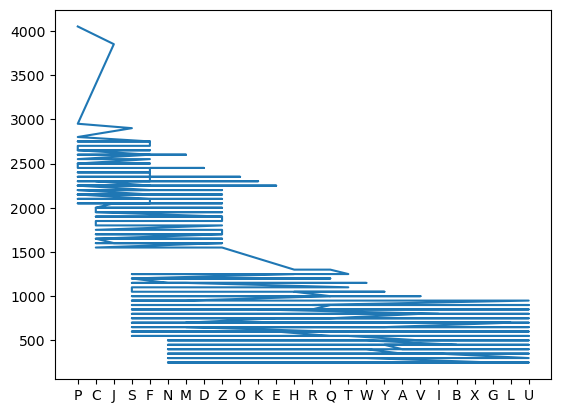

In [12]:
sorted_pnr = sorted(needed_seat, key=lambda x: x['score'],reverse=True)
print(len(sorted_pnr))
print(sorted_pnr[0])

# class_score = {
# }

# for pnr in sorted_pnr:
#     if pnr['class'] not in class_score:
#         class_score[pnr['class']] = []
#     class_score[pnr['class']].append(pnr['score'])

# for _, value in class_score.items():
#     value.sort(reverse=True)

# plot the score distribution
import matplotlib.pyplot as plt
x=[]
y=[]
for i in sorted_pnr:
    x.append(i['class'])
    y.append(i['score'])
print(x)
print(y)
plt.plot(x,y)
plt.show()





['8e4a17', 'f87a3d', '6f8d9c', 'c65e4d', '5fc3e8', '895ee8', '105e86', '83b0d7', '7b9876', 'e6a0fd', 'c40f05', 'ce950f', '38ab49', '2383b0', 'fccab6', 'd127d8', 'c3e5e0', '50e663', '4a387b', '58e903', 'd82291', '49939c', 'cb6705', '0d26a3', '75a90a', '59a1cf', '188cbb', '22aad0', 'b00f4a', '3550c0', 'bdfd1c', '7beac3', 'b0bf96', '9a4117', '8b1296', '942dbc', '2dae7e', 'c1374e', '2ab702', '262470', 'ead910', '8a5234', '747db0', '933c10', '292f5d', 'f4a910', 'a558e8', 'f8c0cf', '8ab748', '32aae0', '8dec0e', '88e7e1', 'aa3587', '7d6132', '191d7c', 'e2a682', 'f3e88c', 'a32822', '474d85', '4dc6a2', '5ca76b', '99fd4d', '7afb23', 'dae49f', 'a10a9e', 'd721a6', 'c3a168', 'ee9e78', 'f56f85', '4cfe5e', '20b988', '6881f7', '28a05e', '8ed383', 'b8e0dd', '228dfe', 'e82f08', '1b2123', '4df8f1', 'ce0ea1', '989e36', '49ffa5', '418c19', '7d67e1', '623e66', 'cee139', '35c60b', '6f3ed1', 'bd7d80', 'c1f69f', '302257', '293893', 'c03ac4', 'a68bd7', 'f391ea', '968f58', '8596c6', '44aea8', 'eac921', '44cfdb',

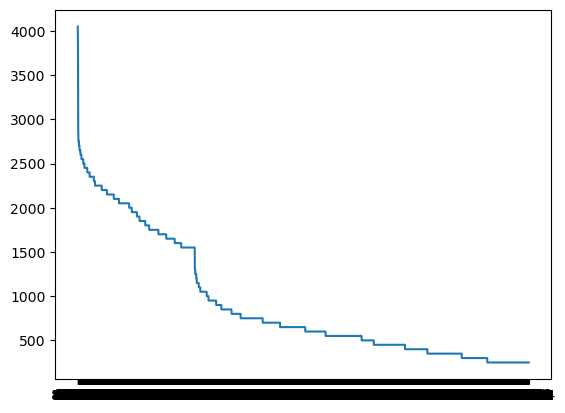

In [13]:
# plot the sorted pnr based on the score
import matplotlib.pyplot as plt
import numpy as np
x=[]
y=[]
for i in sorted_pnr:
    x.append(i['pnr'])
    y.append(i['score'])
print(x)
print(y)
plt.plot(x,y)
plt.show()

In [14]:
import plotly.express as px
import pandas as pd
# Creating a DataFrame from the sorted PNR data
df = pd.DataFrame(sorted_pnr)

# Sorting the DataFrame by score in descending order
df = df.sort_values(by='score', ascending=False)

# Plotting with plotly express
fig = px.bar(df.head(100), x='score', y='pnr', orientation='h', text='score',
             title='PNRs  Scores',
             labels={'score': 'PNR Score', 'pnr': 'PNR'},
             height=600)

# Adding interactivity
fig.update_layout(xaxis_title='PNR Score', yaxis_title='PNR', yaxis_categoryorder='total ascending')

# Show the interactive plot
fig.show()

In [15]:
allocated={}
for i in sorted_pnr:
    allocated[i['pnr']]='NULL'

In [16]:
index_pnr=0
flight_index={i : {'F':0,'B':0,'P':0,'E':0} for i in pnr}
# flight_index
used_seat

{'49275e19': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'f02572c1': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '789d46bd': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '241235aa': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '964283f2': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '2d4bb5d8': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '2513e2bd': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '3770b666': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'aed6747a': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '4772908c': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'ce729d21': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '2d190194': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '5de5ca13': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'ee7a82d9': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '342c63c4': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '9b9f8d16': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'cd623fb0': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '868de684': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'cfffe04f': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '754244c1': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '61ff4c1d': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '2bb4f3d9': 

In [17]:
# ik=0
for i in sorted_pnr:
#     ik+=1
#     if(ik>5):
#         break
#     print(i)
    cabin=map_cabin[i['class']]
    ind = 0
#     print(used_seat)
    while(ind<len(alt_flight[i['flight_id']])):
        
        max_seat=alt_flight[i['flight_id']][ind][cabin]
        print(alt_flight[i['flight_id']][ind])
        alt = {}
        alt['flight_id'] = alt_flight[i['flight_id']][ind]['flight_id']
        alt['arrival_time'] = alt_flight[i['flight_id']][ind]['arrival_time']
        alt['departure_time'] = alt_flight[i['flight_id']][ind]['departure_time']
        print(max_seat)
        print(ind)
        print(alt)
#         print(used_seat)
        
        if(used_seat[alt['flight_id']][cabin]+i['pax']<=max_seat):
            used_seat[alt['flight_id']][cabin]+=i['pax']
            allocated[i['pnr']]=alt
            print("allovc")
            break            
        
        ind+=1
        

{'flight_id': '00d447fe', 'arrival_time': '2024-01-12T02:39:30.346Z', 'departure_time': '2024-01-12T02:04:30.346Z', 'F': 2, 'B': 1, 'P': 5, 'E': 13}
2
0
{'flight_id': '00d447fe', 'arrival_time': '2024-01-12T02:39:30.346Z', 'departure_time': '2024-01-12T02:04:30.346Z'}
allovc
{'flight_id': '2d190194', 'arrival_time': '2023-12-20T00:34:29.562Z', 'departure_time': '2023-12-19T21:35:29.562Z', 'F': 0, 'B': 2, 'P': 2, 'E': 3}
2
0
{'flight_id': '2d190194', 'arrival_time': '2023-12-20T00:34:29.562Z', 'departure_time': '2023-12-19T21:35:29.562Z'}
{'flight_id': '24565385', 'arrival_time': '2023-12-14T08:19:29.683Z', 'departure_time': '2023-12-14T06:42:29.683Z', 'F': 0, 'B': 1, 'P': 0, 'E': 3}
1
0
{'flight_id': '24565385', 'arrival_time': '2023-12-14T08:19:29.683Z', 'departure_time': '2023-12-14T06:42:29.683Z'}
allovc
{'flight_id': '964283f2', 'arrival_time': '2023-12-18T05:23:29.790Z', 'departure_time': '2023-12-18T04:51:29.790Z', 'F': 0, 'B': 2, 'P': 2, 'E': 3}
0
0
{'flight_id': '964283f2', 'ar

In [18]:
used_seat[alt['flight_id']]

{'F': 5, 'B': 5, 'P': 10, 'E': 18}

In [19]:
sum=0
for i in allocated: 
    if allocated[i]=='NULL':
        sum+=1

In [20]:
print(len(allocated))
print(allocated)

4014
{'8e4a17': {'flight_id': '00d447fe', 'arrival_time': '2024-01-12T02:39:30.346Z', 'departure_time': '2024-01-12T02:04:30.346Z'}, 'f87a3d': 'NULL', '6f8d9c': {'flight_id': '24565385', 'arrival_time': '2023-12-14T08:19:29.683Z', 'departure_time': '2023-12-14T06:42:29.683Z'}, 'c65e4d': {'flight_id': '4772908c', 'arrival_time': '2023-12-19T14:31:30.420Z', 'departure_time': '2023-12-19T11:43:30.420Z'}, '5fc3e8': {'flight_id': 'b6762338', 'arrival_time': '2023-12-22T02:19:29.517Z', 'departure_time': '2023-12-21T23:32:29.517Z'}, '895ee8': 'NULL', '105e86': {'flight_id': '70d6a7e6', 'arrival_time': '2023-12-14T07:57:30.003Z', 'departure_time': '2023-12-14T05:56:30.003Z'}, '83b0d7': 'NULL', '7b9876': 'NULL', 'e6a0fd': 'NULL', 'c40f05': 'NULL', 'ce950f': {'flight_id': '14cecff1', 'arrival_time': '2023-12-08T21:30:29.762Z', 'departure_time': '2023-12-08T21:17:29.762Z'}, '38ab49': {'flight_id': 'ecd5012a', 'arrival_time': '2023-12-25T12:25:29.775Z', 'departure_time': '2023-12-25T10:10:29.775Z'

In [21]:
pnr_alt_flight_score = {}
unallocated_pnr = {}
allocated_pnr = {}
for pnr_id in allocated:
    pnr = needed_pnr[pnr_id]
    alt_flight = allocated[pnr_id]
    if alt_flight == "NULL":
        unallocated_pnr[pnr_id] = needed_pnr[pnr_id]
        continue
    allocated_pnr[pnr_id] = needed_pnr[pnr_id]
    pnr_alt_flight_score[(pnr['pnr'], alt_flight['flight_id'])] = get_arrival_score(pnr, alt_flight) + get_departure_score(pnr, alt_flight)
    
print(pnr_alt_flight_score)

{('8e4a17', '00d447fe'): 127.69439675925926, ('6f8d9c', '24565385'): 135.6112976851852, ('c65e4d', '4772908c'): 87.45797037037038, ('5fc3e8', 'b6762338'): 138.56958055555555, ('105e86', '70d6a7e6'): 88.11102731481482, ('ce950f', '14cecff1'): 129.13890833333335, ('38ab49', 'ecd5012a'): 132.139, ('fccab6', '25a29308'): 88.97211666666666, ('50e663', '3e2b52b9'): 137.2220763888889, ('4a387b', '3e2b52b9'): 137.2220763888889, ('58e903', '3e2b52b9'): 137.2220763888889, ('d82291', '4ac0ff0d'): 129.33325925925925, ('49939c', '0cac87ff'): 95.79177129629629, ('0d26a3', 'f0bdef3d'): 118.47233981481482, ('75a90a', '3770b666'): 89.11081527777777, ('188cbb', '14cecff1'): 129.13890833333335, ('3550c0', 'f93bec5a'): 133.41675324074075, ('bdfd1c', '25a29308'): 88.97211666666666, ('7beac3', '227f8ab1'): 132.2085162037037, ('8b1296', '4772908c'): 87.45797037037038, ('ead910', 'e1df8a70'): 130.09734953703702, ('8a5234', 'e1df8a70'): 130.09734953703702, ('747db0', '1ddc1a6f'): 90.09734953703703, ('292f5d', 

In [61]:
print(len(allocated_pnr))
print(len(allocated))

print(allocated_pnr['8e4a17'])


data = []
for key, value in allocated_pnr.items():
    data.append((value['score'], pnr_alt_flight_score[(key, allocated[key]['flight_id'])], value['pnr']))
    
data.sort(key=lambda x: x[1], reverse=True)

x, y1, y2 = [], [], []
for i in data[:1000]:
    x.append(i[2])
    y1.append(i[0] / 30)
    y2.append(i[1]-60)

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='PNR Score'))
fig.add_trace(go.Scatter(x=x, y=y2, name='Allotment Score',mode='lines+markers', line=dict(color='red')))
fig.show()


1824
4014
{'pnr': '8e4a17', 'score': 4050, 'class': 'P', 'pax': 1, 'arrival_time': '2024-01-11T19:25:30.243Z', 'departure_time': '2024-01-11T18:32:30.243Z', 'flight_id': '5ec776c4'}


In [31]:

print(len(allocated_pnr))
print(len(allocated))
sorted_pnrs = sorted(allocated_pnr.keys(), key=lambda x: allocated_pnr[x]['pnr'], reverse=True)[:100]
flight_ids = [allocated[pnr] for pnr in sorted_pnrs][:100]
scores = [int(allocated_pnr[pnr]['score']) for pnr in sorted_pnrs]
scores = [x / 10 for x in scores]
print(len(scores))

# Create a bar chart
fig = go.Figure()

# Bar chart for PNR scores
fig.add_trace(go.Bar(x=sorted_pnrs, y=scores, name='PNR Score'))

# Line chart for rescheduling scores
rescheduling_scores = [pnr_alt_flight_score[(pnr, allocated[pnr]['flight_id'])] for pnr in sorted_pnrs]

assert (len(rescheduling_scores) == len(scores))
socre_map = []
for i in range(len(rescheduling_scores)):
    socre_map.append((rescheduling_scores[i], scores[i], ))

socre_map.sort(key=lambda x: x[0], reverse=True)
# rescheduling_scores = [x for x in rescheduling_scores]
fig.add_trace(go.Scatter(x=sorted_pnrs, y=rescheduling_scores, mode='lines+markers', name='Rescheduling Score', line=dict(color='red')))



# Layout customization
fig.update_layout(
    xaxis=dict(title='PNR'),
    yaxis=dict(title='Score'),
    title='PNRs with High Scores and Rescheduling Scores',
    barmode='group'
)

# Display the plot
fig.show()

1824
4014
100


In [23]:
# Example data (replace with your actual data)
allocated_scores = [allocated_pnr[pnr]['score'] for pnr in allocated_pnr]
unallocated_scores = [unallocated_pnr[pnr]['score'] for pnr in unallocated_pnr]

# Create a stacked bar chart
fig = go.Figure()

# Bar chart for allocated PNRs
fig.add_trace(go.Bar(x=list(allocated_pnr.keys()), y=allocated_scores, name='Allocated', marker_color='blue'))

# Bar chart for unallocated PNRs
fig.add_trace(go.Bar(x=list(unallocated_pnr.keys()), y=unallocated_scores, name='Unallocated', marker_color='orange'))

# Layout customization
fig.update_layout(
    xaxis=dict(title='PNR'),
    yaxis=dict(title='Score'),
    title='Distribution of Allocated and Unallocated PNRs',
    barmode='stack'
)

# Display the plot
fig.show()

In [24]:
import plotly.express as px
import pandas as pd
import numpy as np

# Calculate mean scores
allocated_mean = np.mean(allocated_scores) if allocated_scores else 0
unallocated_mean = np.mean(unallocated_scores) if unallocated_scores else 0

# Create a DataFrame for the number of PNRs
df_count = pd.DataFrame(dict(
    PNRs=['Allocated', 'Unallocated'],
    Count=[len(allocated_pnr), len(unallocated_pnr)]
))

# Create a DataFrame for mean scores
df_mean = pd.DataFrame(dict(
    PNRs=['Allocated', 'Unallocated'],
    MeanScore=[allocated_mean, unallocated_mean]
))

# Create a pie chart for the number of PNRs
fig_count = go.Figure(data=[go.Pie(labels=df_count['PNRs'], values=df_count['Count'], hole=0.3)])
fig_count.update_layout(title_text='Number of Allocated and Unallocated PNRs')

# Create a pie chart for mean scores
fig_mean = go.Figure(data=[go.Pie(labels=df_mean['PNRs'], values=df_mean['MeanScore'], hole=0.3)])
fig_mean.update_layout(title_text='Mean Scores of Allocated and Unallocated PNRs')

# Display the plots side by side
fig_count.show()
fig_mean.show()
